# NN with backpropagation


Loss after iteration 0 : 0.28839726685116684
Batch: [[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]
Loss after iteration 0 : 0.2518271619209451
Batch: [[0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
Loss after iteration 0 : 0.2347659805201382
Batch: [[0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]]
Loss after iteration 0 : 0.21487045635709848
Batch: [[0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Loss after iteration 2000 : 0.02227962423170737
Batch: [[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]
Loss after iteration 2000 : 0.007192360661153093
Batch: [[0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
Loss after iteration 2000 : 0.0031954312612672126
Batch: [[0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]]
Loss after iteration 2000 : 0.013084809075157862
Batch: [[0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
Final predictions on all training data:
[[7.35772704e-01 1.17301125e-01 8.88825843e-02 1.57990672e-04
  2.06108057e-02 1.47593057e-04 1.42181060e-03 6.56160682e-02]
 [1.22317380e-01 8.78054260e-01 3.37478959e-03 7.17213711e-02
  1.16584496e-02 5.07544135e-05

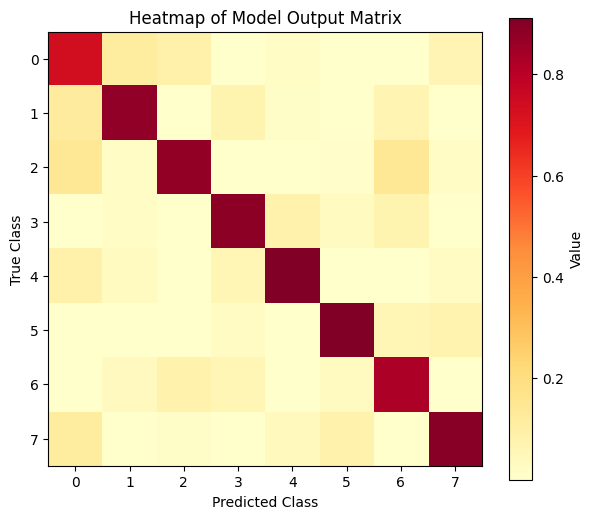

In [87]:
import numpy as np
import matplotlib.pyplot as plt

x = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],
[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]
x_array = np.array(x)
X_train = x_array[0:6]
#print(X_train)
X_test = x_array[6:8]
Y = x_array
#print(Y)

# We need to have 8 inputs (each number in a row of the matrix),a hidden layer with 3 nodes + bias and an output layer with 8 nodes

n_input = 8 # We need to have 8 inputs (each number in a row of the matrix)
n_hidden = 3
n_output = 8
# Weights
np.random.seed(42)
W1 = np.random.rand(n_input, n_hidden) # 8 x 3 Weights for input to hidden
#print(W1)
W2 = np.random.rand(n_hidden, n_output) # 3 x 8 Weights for hidden to output
#print(W2)
# Biases
b1 = np.random.rand(n_hidden) # Bias for hidden layer (3)
b2 = np.random.rand(n_output) # Bias for output layer (8)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def first_layer(X, W1=W1, b1=b1):
    return sigmoid(np.dot(X, W1) + b1)
#print(first_layer(X_train))

def second_layer(hidden_output, W2=W2, b2=b2):
    return sigmoid(np.dot(hidden_output, W2) + b2)

second_layer_output_0 = second_layer(first_layer(X_train))
#print(second_layer_output_0)
# def sigmoid_derivative(x):
#     return x * (1 - x)
for i in range(100000): # Training loop
    # Forward pass
    batches = np.array_split(x_array, 4)
    Y_batches = np.array_split(Y[0:8], 4)
    for X_batch, Y_batch in zip(batches, Y_batches):
        hidden_output = first_layer(X_batch)
        #print("Hidden output after iteration", i, ":", hidden_output)
        output = second_layer(hidden_output)
        #print("Output after iteration", i, ":", output)
        # Compute loss (Mean Squared Error)
        loss_value = (1/2 *(Y_batch - output) ** 2)

        
        # Backpropagation
        output_error = Y_batch - output # This is the result of doing the derivative of the loss function; 
        # The minus sign of gradient descent has already been taken into account here
        output_delta = output_error * (output * (1 - output)) # loss derivative * sigmoid derivative (descent direction)
        #print("Output delta after iteration", i, ":", output_delta) # 8 x 2 matrix
        
        hidden_error = output_delta.dot(W2.T) # 3 x 2 matrix
        #print("Hidden error after iteration", i, ":", hidden_error)
        hidden_delta = hidden_error * (hidden_output * (1 - hidden_output))
        lr = 0.2 # Learning rate
        # Update weights and biases
        W2 += lr*hidden_output.T.dot(output_delta)
        b2 += np.sum(output_delta, axis=0)
        W1 += lr* X_batch.T.dot(hidden_delta)
        b1 += np.sum(hidden_delta, axis=0)
        if i % 2000 == 0:
            print("Loss after iteration", i, ":", np.mean(loss_value))
            print ("Batch:", X_batch)
    if np.mean(loss_value) < 0.0025:
        final_output = second_layer(first_layer(x_array))
        print("Final predictions on all training data:")
        print(final_output)
        # print("Predictions on test data:")
        # print(second_layer(first_layer(X_test)))


        plt.figure(figsize=(7, 6))
        plt.imshow(final_output, cmap='YlOrRd', interpolation='nearest')  # red-yellow colormap
        plt.colorbar(label='Value')
        plt.title('Heatmap of Model Output Matrix')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

        break

    

def loss(Y, second_layer_output_0):
    return (1/2*(Y - second_layer_output_0) ** 2)
#loss_value = loss(Y[0:6], second_layer_output_0)
#print("Loss:", loss_value[0])